In [1]:
%matplotlib inline
from pylab import *

In [2]:
from deficit_defs import *

Splikes version  0.1.2
Plasticnet version  0.1.6
macOS-10.16-x86_64-i386-64bit
Base Image File: asdf/bbsk081604_all_log2dog.asdf


In [3]:
_debug = False
if _debug:
    print("Debugging")

In [4]:
base='sims/2022-12-01'
if not os.path.exists(base):
    print(f"mkdir {base}")
    os.mkdir(base)

In [5]:
rf_size=19
#eta_mat=linspace(1e-7,5e-6,11)
eta=2e-6
blur_mat=linspace(0,16,33)
mu_c_mat=linspace(0,20,9)
sigma_c=1

print(blur_mat)
number_of_neurons=20
number_of_processes=4

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16. ]


In [6]:
mu_c_mat=array([0,20])
mu_c_mat

array([ 0, 20])

## Premake the image files

In [7]:
base_image_file='asdf/bbsk081604_all.asdf'
print("Base Image File:",base_image_file)

normal_image=pi5.filtered_images(
                                base_image_file,
                                {'type':'log2dog','sd1':1,'sd2':3},
                                )

for blur in blur_mat:

    Lfname=pi5.filtered_images(
                                base_image_file,
                                {'type':'blur','size':blur},
                                {'type':'log2dog','sd1':1,'sd2':3},
                                )




Base Image File: asdf/bbsk081604_all.asdf
Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_fcf524b121311f6c8d3021738d0d9176.asdf from cache.Using cache_images/cache_images_84de1df7ec28e9fff71aa008fabc28ab.asdf from cache.Using cache_images/cache_images_9a3a8257f75df7fd8fd5b6731003da35.asdf from cache.Using cache_images/cache_images_dc449597e25b03aa549e59deb9230231.asdf from cache.Using cache_images/cache_images_a5a33890731b1a868baaebecee76c71d.asdf from cache.Using cache_images/cache_images_bfccd490ea9947384e0a7d994f955e3c.asdf from cache.Using cache_images/cache_images_6aedbf5e39e78c1beb4a47361965a2da.asdf from cache.Using cache_images/cache_images_9cead8acc8be7d3720d5d49758a4beba.asdf from cache.Using cache_images/cache_images_61ad4395acceb1fc40934928f3dcc141.asdf from cache.Using cache_images/cache_images_f1b88d5f120a7046b8e62e430edf90ad.asdf from cache.Using cache_images/cache_images_43c7077591f67b05006774599a6b41da.as

In [8]:
def blur_jitter_deficit(blur=[2.5,-1],
                        noise=[0.1,.1],
                        rf_size=19,eta=2e-6,
                        mu_c=0,sigma_c=0,    
                        mu_r=0,sigma_r=0,
                        number_of_neurons=10,
                        total_time=8*day,
                        save_interval=1*hour):

    
    if _debug:
        total_time=1*minute
        save_interval=1*second
        
    images=[]
    dt=200*ms
    
    for bv in blur:
        if bv<=0:
            im=pi5.filtered_images(
                                base_image_file,
                                {'type':'log2dog','sd1':1,'sd2':3},
                                )
        else:
            im=pi5.filtered_images(
                                    base_image_file,
                                    {'type':'blur','size':bv},
                                    {'type':'log2dog','sd1':1,'sd2':3},
                                    )
        images.append(im)
        
        
    dt=200*ms        
    pre1=pn.neurons.natural_images_with_jitter(images[0],
                                                rf_size=rf_size,
                                                time_between_patterns=dt,
                                                sigma_r=0,
                                                sigma_c=0,
                                                buffer_c=mu_c+2*sigma_c,
                                                buffer_r=mu_r+2*sigma_r,
                                                verbose=False)

    pre2=pn.neurons.natural_images_with_jitter(images[1],
                                                rf_size=rf_size,
                                                other_channel=pre1,
                                                time_between_patterns=dt,
                                                mu_r=mu_r,mu_c=mu_c,
                                                sigma_r=sigma_r,sigma_c=sigma_c,
                                                verbose=False)



    sigma=noise
    pre1+=pn.neurons.process.add_noise_normal(0,sigma)

    sigma=noise
    pre2+=pn.neurons.process.add_noise_normal(0,sigma)

    pre=pre1+pre2

    post=default_post(number_of_neurons)
    c=default_bcm(pre,post)
    c.eta=eta

    sim=pn.simulation(total_time)
    sim.dt=dt

    sim.monitor(post,['output'],save_interval)
    sim.monitor(c,['weights','theta'],save_interval)

    sim+=pn.grating_response(print_time=False)

    return sim,[pre,post],[c]

def blur_deficit(blur=[2.5,-1],
            noise=[0.1,.1],
                 rf_size=19,eta=2e-6,
           number_of_neurons=10,
           total_time=8*day,
           save_interval=1*hour):

    
    if _debug:
        total_time=1*minute
        save_interval=1*second
        
    images=[]
    
    for bv in blur:
        if bv<=0:
            im=pi5.filtered_images(
                                base_image_file,
                                {'type':'log2dog','sd1':1,'sd2':3},
                                )
        else:
            im=pi5.filtered_images(
                                    base_image_file,
                                    {'type':'blur','size':bv},
                                    {'type':'log2dog','sd1':1,'sd2':3},
                                    )
        images.append(im)
        
    pre1=pn.neurons.natural_images(images[0],
                                   rf_size=rf_size,verbose=False)

    pre2=pn.neurons.natural_images(images[1],rf_size=rf_size,
                                other_channel=pre1,
                                verbose=False)

    sigma=noise
    pre1+=pn.neurons.process.add_noise_normal(0,sigma)

    sigma=noise
    pre2+=pn.neurons.process.add_noise_normal(0,sigma)

    pre=pre1+pre2

    post=default_post(number_of_neurons)
    c=default_bcm(pre,post)
    c.eta=eta

    sim=pn.simulation(total_time)
    sim.dt=200*ms

    sim.monitor(post,['output'],save_interval)
    sim.monitor(c,['weights','theta'],save_interval)

    sim+=pn.grating_response(print_time=False)

    return sim,[pre,post],[c]

In [9]:
def run_one(params,overwrite=False):
    import plasticnet as pn
    count,eta,noise,blur,number_of_neurons,sfname,mu_c,sigma_c=(params.count,params.eta,params.noise,params.blur,
                                        params.number_of_neurons,params.sfname,params.mu_c,params.sigma_c)
    
    if not overwrite and os.path.exists(sfname):
        return sfname
    
    seq=pn.Sequence()

    t=16*day*2
    ts=1*hour

    # DEBUG
    if _debug:
        t=1*minute
        ts=1*second
    
    seq+=blur_jitter_deficit(blur=[blur,-1],
                                total_time=t,
                                noise=noise,eta=eta,number_of_neurons=number_of_neurons,
                                mu_c=mu_c,sigma_c=sigma_c,
                                save_interval=ts)

    
    seq.run(display_hash=False)
    pn.save(sfname,seq) 
    
    return sfname
    


In [10]:
total_time=8*day
real_time=5*60+ 55

In [11]:
from collections import namedtuple
params = namedtuple('params', ['count', 'eta','noise','blur','number_of_neurons','sfname','mu_c','sigma_c'])
all_params=[]
count=0
eta_count=0
noise_count=0
open_eye_noise=0.0

for mu_count,mu_c in enumerate(mu_c_mat):
    for blur_count,blur in enumerate(blur_mat):
        all_params.append(params(count=count,
                         eta=eta,
                             blur=blur,
                         noise=open_eye_noise,
                         number_of_neurons=number_of_neurons,
                        sfname=f'{base}/deficit %d neurons logdog %d eta %d noise %d blur %d mu_c %d sigma_c.asdf' % 
                                 (number_of_neurons,eta_count,noise_count,blur_count,mu_c,sigma_c),
                        mu_c=mu_c,
                            sigma_c=sigma_c,
                                ))
        
        count+=1
        
for a in all_params[:5]:
    print(a)
print("[....]")
for a in all_params[-5:]:
    print(a)

print(len(all_params))

print(time2str(real_time*len(all_params)/number_of_processes))


params(count=0, eta=2e-06, noise=0.0, blur=0.0, number_of_neurons=20, sfname='sims/2022-12-01/deficit 20 neurons logdog 0 eta 0 noise 0 blur 0 mu_c 1 sigma_c.asdf', mu_c=0, sigma_c=1)
params(count=1, eta=2e-06, noise=0.0, blur=0.5, number_of_neurons=20, sfname='sims/2022-12-01/deficit 20 neurons logdog 0 eta 0 noise 1 blur 0 mu_c 1 sigma_c.asdf', mu_c=0, sigma_c=1)
params(count=2, eta=2e-06, noise=0.0, blur=1.0, number_of_neurons=20, sfname='sims/2022-12-01/deficit 20 neurons logdog 0 eta 0 noise 2 blur 0 mu_c 1 sigma_c.asdf', mu_c=0, sigma_c=1)
params(count=3, eta=2e-06, noise=0.0, blur=1.5, number_of_neurons=20, sfname='sims/2022-12-01/deficit 20 neurons logdog 0 eta 0 noise 3 blur 0 mu_c 1 sigma_c.asdf', mu_c=0, sigma_c=1)
params(count=4, eta=2e-06, noise=0.0, blur=2.0, number_of_neurons=20, sfname='sims/2022-12-01/deficit 20 neurons logdog 0 eta 0 noise 4 blur 0 mu_c 1 sigma_c.asdf', mu_c=0, sigma_c=1)
[....]
params(count=61, eta=2e-06, noise=0.0, blur=14.0, number_of_neurons=20, s

In [12]:
do_params=make_do_params(all_params)
len(do_params)

0

In [33]:
%%time
run_one_left_blur(all_params[0],overwrite=True)

Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.[.] Sequence Time Elapsed...5 m, 49.71 s
CPU times: user 5min 52s, sys: 825 ms, total: 5min 53s
Wall time: 5min 53s


'sims/2022-11-03/deficit 20 neurons logdog 0 eta 0 noise 0 blur.asdf'

In [ ]:
pool = Pool(processes=number_of_processes)
result = pool.map_async(run_one, all_params)
print(result.get())

Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_bfccd490ea9947384e0a7d994f955e3c.asdf from cache.Using cache_images/cache_images_43c7077591f67b05006774599a6b41da.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_2093f6f2dcf07a3e9d1c7b696737414d.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.Using cache_images/cache_images_26c21bb98ee35e2306d1fd04c30276c2.asdf from cache.[

In [13]:
RR={}
count=0
for params in all_params:
    RR[params.sfname]=Results(params.sfname)

0it [00:00, ?it/s]

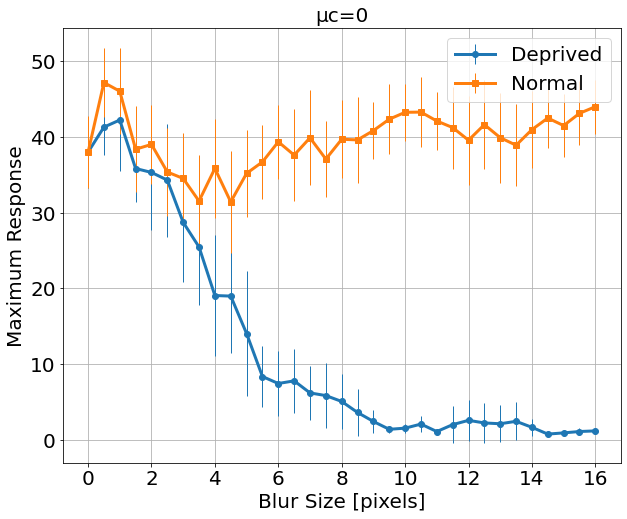

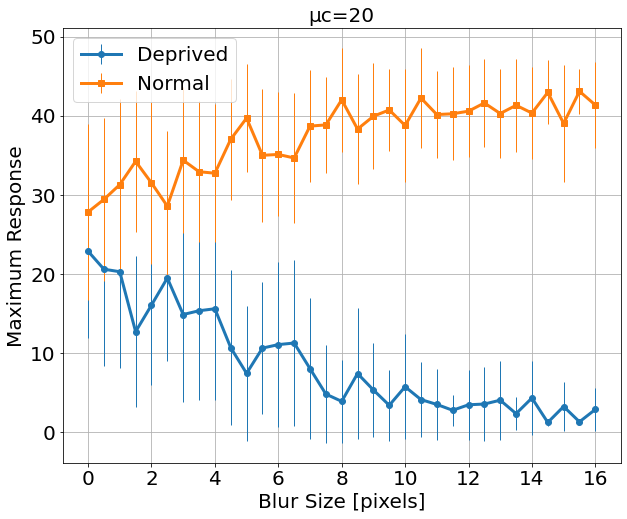

In [14]:
count=0
for mu_count,mu_c in tqdm(enumerate(mu_c_mat)):
    s=Storage()
    for blur_count,blur in enumerate(blur_mat):
        params=all_params[count]
        count+=1
        R=RR[params.sfname]
        blur=params.blur
        μ1,μ2=R.μσ[0][0]
        σ1,σ2=R.μσ[1][0]

        s+=blur,μ1,μ2,σ1,σ2
    
    
    blur,μ1,μ2,σ1,σ2=s.arrays()
    
    figure()
    errorbar(blur,μ1,yerr=2*σ1,marker='o',elinewidth=1,label='Deprived')
    errorbar(blur,μ2,yerr=2*σ2,marker='s',elinewidth=1,label='Normal')
    xlabel('Blur Size [pixels]')
    ylabel('Maximum Response')
    title(f'μc={mu_c}')
    legend()    

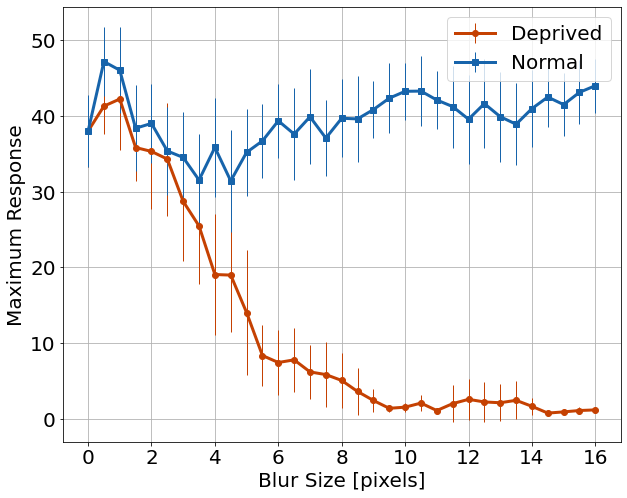

In [15]:
s=Storage()
count=0
for blur_count,blur in enumerate(blur_mat):
    params=all_params[count]
    count+=1
    R=RR[params.sfname]
    blur=params.blur
    μ1,μ2=R.μσ[0][0]
    σ1,σ2=R.μσ[1][0]

    s+=blur,μ1,μ2,σ1,σ2

blur,μ1,μ2,σ1,σ2=s.arrays()
figure()
errorbar(blur,μ1,yerr=2*σ1,marker='o',elinewidth=1,label='Deprived',color=cm.Oranges(0.8))
errorbar(blur,μ2,yerr=2*σ2,marker='s',elinewidth=1,label='Normal',color=cm.Blues(0.8))
xlabel('Blur Size [pixels]')
ylabel('Maximum Response')
legend()

### No jitter result 

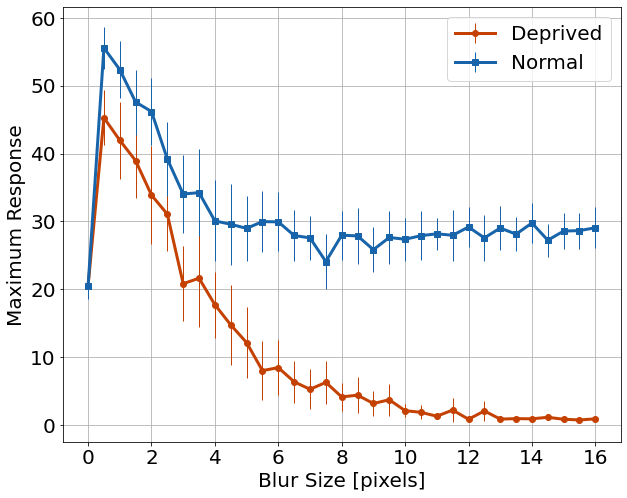